In [ ]:
#######对差异编辑进行分簇可视化后，对基因的表达也做同样的分析，期待有一致/相反的趋势
# 确保载入所需的库
library(tidyr)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(pheatmap)
library(limma)
#library(ggtree)  #聚类
#library(aplot) 

In [2]:
.libPaths('/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library')

In [2]:
#########PFC样本ADAR家族表达情况
expression_08 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884059_GW8_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_12 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884066_GW12_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_16_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884070_GW16_PFC1_3.UMI_TPM_no_ERCC.txt",header=T)
expression_16_4 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884071_GW16_PFC1_4.UMI_TPM_no_ERCC.txt",header=T)
expression_16_9 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884076_GW16_PFC1_9.UMI_TPM_no_ERCC.txt",header=T)
expression_19_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884077_GW19_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_19_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884078_GW19_PFC2.UMI_TPM_no_ERCC.txt",header=T)
expression_19_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884079_GW19_PFC3.UMI_TPM_no_ERCC.txt",header=T)
expression_23_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884080_GW23_PFC1_1.UMI_TPM_no_ERCC.txt",header=T)
expression_23_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884081_GW23_PFC1_2.UMI_TPM_no_ERCC.txt",header=T)
expression_23_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884082_GW23_PFC1_3.UMI_TPM_no_ERCC.txt",header=T)
expression_26_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884084_GW26_PFC1_1.UMI_TPM_no_ERCC.txt",header=T)

In [3]:
dim(expression_08)
dim(expression_12)
dim(expression_16_3)
dim(expression_16_4)
dim(expression_16_9)
dim(expression_19_1)
dim(expression_19_2)
dim(expression_19_3)
dim(expression_23_1)
dim(expression_23_2)
dim(expression_23_3)
dim(expression_26_1)


[1] 24153    24

[1] 24153    89

[1] 24153    89

[1] 24153    89

[1] 24153    89

[1] 24153    41

[1] 24153    40

[1] 24153    40

[1] 24153    49

[1] 24153    48

[1] 24153    47

[1] 24153    65

In [3]:
head(expression_26_1)

,Gene,GW26_PFC1_M4_sc1,GW26_PFC1_M4_sc2,GW26_PFC1_M4_sc3,GW26_PFC1_M4_sc4,GW26_PFC1_M4_sc5,GW26_PFC1_M4_sc6,GW26_PFC1_M4_sc7,GW26_PFC1_M4_sc8,GW26_PFC1_M4_sc9,⋯,GW26_PFC1_J4_sc5,GW26_PFC1_J4_sc6,GW26_PFC1_J4_sc7,GW26_PFC1_J4_sc8,GW26_PFC1_I4_sc1,GW26_PFC1_I4_sc2,GW26_PFC1_I4_sc3,GW26_PFC1_I4_sc4,GW26_PFC1_I4_sc5,GW26_PFC1_I4_sc6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0,0.0,0,0,3.33,0,21.70,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,A1BG-AS1,0,0.0,0,0,0.00,0,0.00,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,A1CF,0,0.0,0,0,0.00,0,0.00,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,A2M,0,3.4,0,0,0.00,0,573.96,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,A2M-AS1,0,0.0,0,0,0.00,0,4.82,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,A2ML1,0,0.0,0,0,0.00,0,0.00,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
rownames(expression_08) <- expression_08$Gene
expression_08 <- expression_08[,-1]
rownames(expression_12) <- expression_12$Gene
expression_12 <- expression_12[,-1]
rownames(expression_16_3) <- expression_16_3$Gene
expression_16_3 <- expression_16_3[,-1]
rownames(expression_16_4) <- expression_16_4$Gene
expression_16_4 <- expression_16_4[,-1]
rownames(expression_16_9) <- expression_16_9$Gene
expression_16_9 <- expression_16_9[,-1]
rownames(expression_19_1) <- expression_19_1$Gene
expression_19_1 <- expression_19_1[,-1]
rownames(expression_19_2) <- expression_19_2$Gene
expression_19_2 <- expression_19_2[,-1]
rownames(expression_19_3) <- expression_19_3$Gene
expression_19_3 <- expression_19_3[,-1]
rownames(expression_23_1) <- expression_23_1$Gene
expression_23_1 <- expression_23_1[,-1]
rownames(expression_23_2) <- expression_23_2$Gene
expression_23_2 <- expression_23_2[,-1]
rownames(expression_23_3) <- expression_23_3$Gene
expression_23_3 <- expression_23_3[,-1]
rownames(expression_26_1) <- expression_26_1$Gene
expression_26_1 <- expression_26_1[,-1]

In [5]:
###按细胞类型对表达数据分组
GABA_cellTag_08 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW08/GABAergic_neurons_cellTag.txt")[,1]
expression_08_GABA <- expression_08[,GABA_cellTag_08]
GABA_cellTag_12 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW12/GABAergic_neurons_cellTag.txt")[,1]
expression_12_GABA <- expression_12[,GABA_cellTag_12]
GABA_cellTag_16_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_16_3_GABA <- expression_16_3[,GABA_cellTag_16_3]
GABA_cellTag_16_4 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_4/GABAergic_neurons_cellTag.txt")[,1]
expression_16_4_GABA <- expression_16_4[,GABA_cellTag_16_4]
GABA_cellTag_16_9 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_9/GABAergic_neurons_cellTag.txt")[,1]
expression_16_9_GABA <- expression_16_9[,GABA_cellTag_16_9]
GABA_cellTag_19_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_19_1_GABA <- expression_19_1[,GABA_cellTag_19_1]
GABA_cellTag_19_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_2/GABAergic_neurons_cellTag.txt")[,1]
expression_19_2_GABA <- expression_19_2[,GABA_cellTag_19_2]
GABA_cellTag_19_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_19_3_GABA <- expression_19_3[,GABA_cellTag_19_3]
GABA_cellTag_23_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_23_1_GABA <- expression_23_1[,GABA_cellTag_23_1]
GABA_cellTag_23_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_2/GABAergic_neurons_cellTag.txt")[,1]
expression_23_2_GABA <- expression_23_2[,GABA_cellTag_23_2]
GABA_cellTag_23_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_23_3_GABA <- expression_23_3[,GABA_cellTag_23_3]
GABA_cellTag_26_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW26_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_26_1_GABA <- expression_26_1[,GABA_cellTag_26_1]

In [6]:
head(expression_08_GABA)

,GW08_PFC1_sc16,GW08_PFC1_sc19,GW08_PFC1_sc2
,<dbl>,<dbl>,<dbl>
A1BG,0,0,0
A1BG-AS1,0,0,0
A1CF,0,0,0
A2M,0,0,0
A2M-AS1,0,0,0
A2ML1,0,0,0


In [7]:
avg_gene_expr_08 <- rowSums(expression_08_GABA)/rowSums(expression_08_GABA!=0)
avg_gene_expr_08[is.na(avg_gene_expr_08)] <- 0
avg_gene_expr_12 <- rowSums(expression_12_GABA)/rowSums(expression_12_GABA!=0)
avg_gene_expr_12[is.na(avg_gene_expr_12)] <- 0
avg_gene_expr_16_3 <- rowSums(expression_16_3_GABA)/rowSums(expression_16_3_GABA!=0)
avg_gene_expr_16_3[is.na(avg_gene_expr_16_3)] <- 0
avg_gene_expr_16_4 <- rowSums(expression_16_4_GABA)/rowSums(expression_16_4_GABA!=0)
avg_gene_expr_16_4[is.na(avg_gene_expr_16_4)] <- 0
avg_gene_expr_16_9 <- rowSums(expression_16_9_GABA)/rowSums(expression_16_9_GABA!=0)
avg_gene_expr_16_9[is.na(avg_gene_expr_16_9)] <- 0
avg_gene_expr_19_1 <- rowSums(expression_19_1_GABA)/rowSums(expression_19_1_GABA!=0)
avg_gene_expr_19_1[is.na(avg_gene_expr_19_1)] <- 0
avg_gene_expr_19_2 <- rowSums(expression_19_2_GABA)/rowSums(expression_19_2_GABA!=0)
avg_gene_expr_19_2[is.na(avg_gene_expr_19_2)] <- 0
avg_gene_expr_19_3 <- rowSums(expression_19_3_GABA)/rowSums(expression_19_3_GABA!=0)
avg_gene_expr_19_3[is.na(avg_gene_expr_19_3)] <- 0
avg_gene_expr_23_1 <- rowSums(expression_23_1_GABA)/rowSums(expression_23_1_GABA!=0)
avg_gene_expr_23_1[is.na(avg_gene_expr_23_1)] <- 0
avg_gene_expr_23_2 <- rowSums(expression_23_2_GABA)/rowSums(expression_23_2_GABA!=0)
avg_gene_expr_23_2[is.na(avg_gene_expr_23_2)] <- 0
avg_gene_expr_23_3 <- rowSums(expression_23_3_GABA)/rowSums(expression_23_3_GABA!=0)
avg_gene_expr_23_3[is.na(avg_gene_expr_23_3)] <- 0
avg_gene_expr_26_1 <- rowSums(expression_26_1_GABA)/rowSums(expression_26_1_GABA!=0)
avg_gene_expr_26_1[is.na(avg_gene_expr_26_1)] <- 0

In [8]:
avg_expr_all_phases <- as.data.frame(cbind(avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,
                                            avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,
                                            avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1))
head(avg_expr_all_phases)

,avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0.000000,0.00,686.325,2.9900,286.69,0.00,160.93,0.00,695.73,36.965,77.3020
A1BG-AS1,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.0000
A1CF,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,5.58,0.000,0.0000
A2M,0,8.996667,7.97,49.400,30.6075,147.43,5.72,0.00,9.73,0.00,0.000,233.0325
A2M-AS1,0,0.000000,0.00,0.000,65.4100,0.00,0.00,0.00,0.00,0.00,0.000,4.8200
A2ML1,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,0.00,14.200,38.1200


In [9]:
avg_expr_all_phases <- avg_expr_all_phases[which(rowSums(avg_expr_all_phases)!=0),]

In [10]:
head(rownames(avg_expr_all_phases))

[1] "A1BG"    "A1CF"    "A2M"     "A2M-AS1" "A2ML1"   "A2MP1"

In [11]:
genes_cluster <- read.table('/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_editing/GABAergic_neurons/genes_de_edited_sites_cluster3.txt')[,1]
head(genes_cluster)

[1] "ABI2"        "AC004951.6"  "AC004980.11" "AC004980.9"  "AC007000.12"
[6] "AC007383.4"

In [12]:
gene_cluster_expr <- avg_expr_all_phases[rownames(avg_expr_all_phases) %in% genes_cluster,]
dim(gene_cluster_expr)

[1] 73 12

In [13]:
########同一簇内的基因表达如何可视化看趋势变化？？？？？？？？
head(gene_cluster_expr)

,avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABI2,275.775,691.195,148.6975,189.7183,368.9780,295.0267,41.720,184.4900,412.4000,198.5227,410.8520,442.0342
AGAP9,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,1.7100
BICD1,47.370,331.425,116.4250,1520.6500,169.5267,46.3500,16.730,319.9850,332.7650,493.0900,377.2467,537.4209
BNIP3L,189.440,395.880,146.7544,261.6871,278.8533,276.1767,202.234,238.3025,479.4847,500.0542,452.3414,395.1400
BRINP3,236.870,0.000,68.3900,14.4150,3.0000,52.1900,12.450,0.0000,5.6400,0.0000,0.0000,145.5300
CCDC148,0.000,0.000,0.0000,0.0000,10.3000,0.0000,0.000,16.0400,469.2700,0.0000,609.6600,107.3200


In [90]:
####先鉴定差异表达基因
#boxplot(as.vector(t(avg_expr_all_phases)))
#quantile(as.vector(t(avg_expr_all_phases)))
all_values <- as.vector(t(avg_expr_all_phases))
Q1 <- quantile(all_values,0.25)
Q3 <- quantile(all_values,0.75)
sub_avg_expr_all_phases1 <- avg_expr_all_phases
sub_avg_expr_all_phases1[sub_avg_expr_all_phases1 < Q1 | sub_avg_expr_all_phases1 > Q3] <- 0


In [92]:
sub_avg_expr_all_phases1 <- sub_avg_expr_all_phases1[which(rowSums(sub_avg_expr_all_phases1)!=0),]

In [93]:
dim(sub_avg_expr_all_phases1)

[1] 15827    12

[1]   1.6400 887.6873

0%      25%      50%      75%     100% 
  1.6400  46.8750 126.7000 232.4803 887.6873

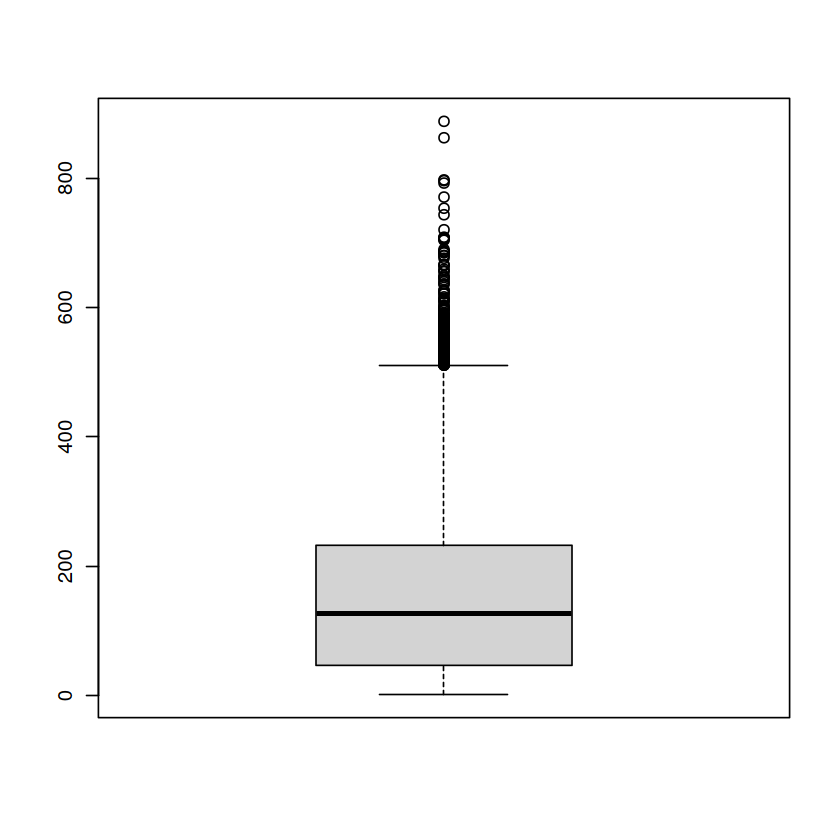

In [95]:
###对每个基因在所有样本中求和，去除和值过低的基因，以免影响下游分析
gene_expr_sum <- rowSums(sub_avg_expr_all_phases1)
boxplot(gene_expr_sum)
range(gene_expr_sum)
quantile(gene_expr_sum)

In [96]:
Q1 <- quantile(gene_expr_sum, 0.25)
Q3 <- quantile(gene_expr_sum, 0.75)
Q1
Q3
IQR <- Q3 - Q1

#IQR

# 定义离群点范围
#lower_bound <- Q1 - 1.5 * IQR
#upper_bound <- Q3 + 1.5 * IQR
# 标记离群点
input_genes_loc <- which(gene_expr_sum >= Q1 & gene_expr_sum <= Q3)


25% 
46.875

75% 
232.4803

In [97]:
length(input_genes_loc)

[1] 7913

In [98]:

sub_avg_expr_all_phases2 <- sub_avg_expr_all_phases1[input_genes_loc,]
sub_avg_expr_all_phases2 <- sub_avg_expr_all_phases2[rowSums(sub_avg_expr_all_phases2)!=0,]

In [99]:
dim(sub_avg_expr_all_phases2)
dim(avg_expr_all_phases)

[1] 7913   12

[1] 16823    12

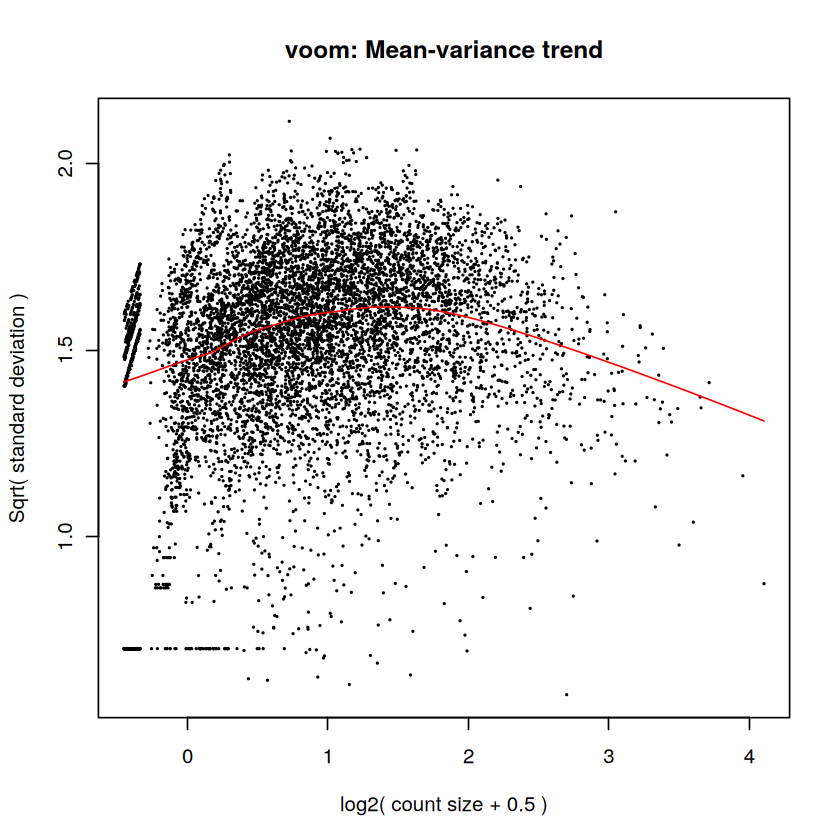

In [100]:
colData <- data.frame(
    sampleName = colnames(sub_avg_expr_all_phases2), # 样本名称
    group = c('week8','week12',rep('week16',3),rep('week19',3),rep('week23',3),'week26')  # 分组信息
)

design <- model.matrix(~ 0 + group, data = colData) # 设定模型设计
v <- voom(sub_avg_expr_all_phases2, design, plot = TRUE) # voom转换并返回一个voom对象

In [101]:
fit <- lmFit(v, design) # 建立线性模型
fit <- eBayes(fit) # 使用 empirical Bayes 方法进行统计推断

In [102]:
# 选择显著差异表达的基因，例如基于FDR矫正后的p值（adj.P.Val）和对数 fold 改变（logFC）
res <- topTable(fit, coef = 1, adjust.method = "fdr", sort.by = "P", n = Inf)

In [103]:
attach(res)
head(res)

The following objects are masked from res (pos = 3):

    adj.P.Val, AveExpr, B, logFC, P.Value, t


The following objects are masked from res (pos = 4):

    adj.P.Val, AveExpr, B, logFC, P.Value, t


The following objects are masked from res (pos = 9):

    adj.P.Val, AveExpr, B, logFC, P.Value, t




,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GYS2,11.00621,3.903366,8.157011,4.411171e-07,0.0002601629,4.271268
LOC101928304,11.00621,3.379398,8.157011,4.411171e-07,0.0002601629,4.271268
TNIP3,11.00621,3.379398,8.157011,4.411171e-07,0.0002601629,4.271268
LINC01232,10.99228,3.378236,8.146684,4.484579e-07,0.0002601629,4.262196
GCKR,10.98251,3.377423,8.139448,4.536775e-07,0.0002601629,4.255830
NTNG2,10.98251,3.872260,8.139448,4.536775e-07,0.0002601629,4.255830


In [104]:
de_genes_res <- res[which(abs(logFC)>1 & adj.P.Val < 0.05),]
dim(de_genes_res)

[1] 1959    6

In [105]:
de_data <- avg_expr_all_phases[rownames(de_genes_res),]
dim(de_data)

[1] 1959   12

In [ ]:
all_gene_expr_with_p_values <- avg_expr_all_phases
all_gene_expr_with_p_values$p_value <- res$P.Value
all_gene_expr_with_p_values$adjust_p <- res$adj.P.Val
dim(all_gene_expr_with_p_values)

In [37]:
head(all_gene_expr_with_p_values)

,avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1,p_value,adjust_p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0.000000,0.00,686.325,2.9900,286.69,0.00,160.93,0.00,695.73,36.965,77.3020,6.295562e-19,7.632177e-15
A1CF,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,5.58,0.000,0.0000,9.760461e-19,7.632177e-15
A2M,0,8.996667,7.97,49.400,30.6075,147.43,5.72,0.00,9.73,0.00,0.000,233.0325,1.361106e-18,7.632177e-15
A2M-AS1,0,0.000000,0.00,0.000,65.4100,0.00,0.00,0.00,0.00,0.00,0.000,4.8200,9.325986e-17,3.922043e-13
A2ML1,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,0.00,14.200,38.1200,1.507746e-16,4.261118e-13
A2MP1,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,84.59,0.00,0.000,0.0000,1.519837e-16,4.261118e-13


In [99]:
write.table(all_gene_expr_with_p_values,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_expr/GABAergic_neurons/all_gene_expr_with_p_values_limma.txt",quote=F,sep='\t')

In [ ]:
######对差异编辑位点分簇
# 加载必要的库
library(cluster) # 可能需要安装这个包来进行聚类分析
library(dendextend)
library(ape)
library(factoextra)

In [108]:
dim(de_data)

[1] 1959   12

In [107]:
vector_data <- as.vector(t(de_data))
length(vector_data)
head(de_data)

[1] 23508

,avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GYS2,0.00,122.26,0,0,0.00,0,0,0,0,0,0,38.560
LOC101928304,0.00,122.26,0,0,0.00,0,0,0,0,0,0,0.000
TNIP3,0.00,122.26,0,0,0.00,0,0,0,0,0,0,0.000
LINC01232,0.00,121.08,0,0,0.00,0,0,0,0,0,0,0.000
GCKR,0.00,120.26,0,0,0.00,0,0,0,0,0,0,0.000
NTNG2,162.38,120.26,0,0,191.86,0,0,0,0,0,0,30.155


In [109]:
df_expanded <- data.frame(
  Row = rep(rownames(de_data), times = ncol(de_data)),
  Col = rep(colnames(de_data), each = nrow(de_data)),
  Value = vector_data
)

# 查看转换后的数据框
head(df_expanded)

,Row,Col,Value
,<chr>,<chr>,<dbl>
1,GYS2,avg_gene_expr_08,0.00
2,LOC101928304,avg_gene_expr_08,122.26
3,TNIP3,avg_gene_expr_08,0.00
4,LINC01232,avg_gene_expr_08,0.00
5,GCKR,avg_gene_expr_08,0.00
6,NTNG2,avg_gene_expr_08,0.00


In [110]:
dist_obj <- dist(df_expanded$Value,method = "euclidean")
hclust_obj <- hclust(dist_obj,method='ward.D2')


In [76]:

dend <- df_expanded$Value %>%
  dist(method = "euclidean") %>%
  hclust() %>%
  as.phylo()


In [77]:
# 步骤3: 确定最佳聚类数
# 绘制树状图
#dend <- as.phylo.dendrogram(hclust_obj)
plot(dend)
#hclust_obj


Call:
hclust(d = dist_obj, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 26520 


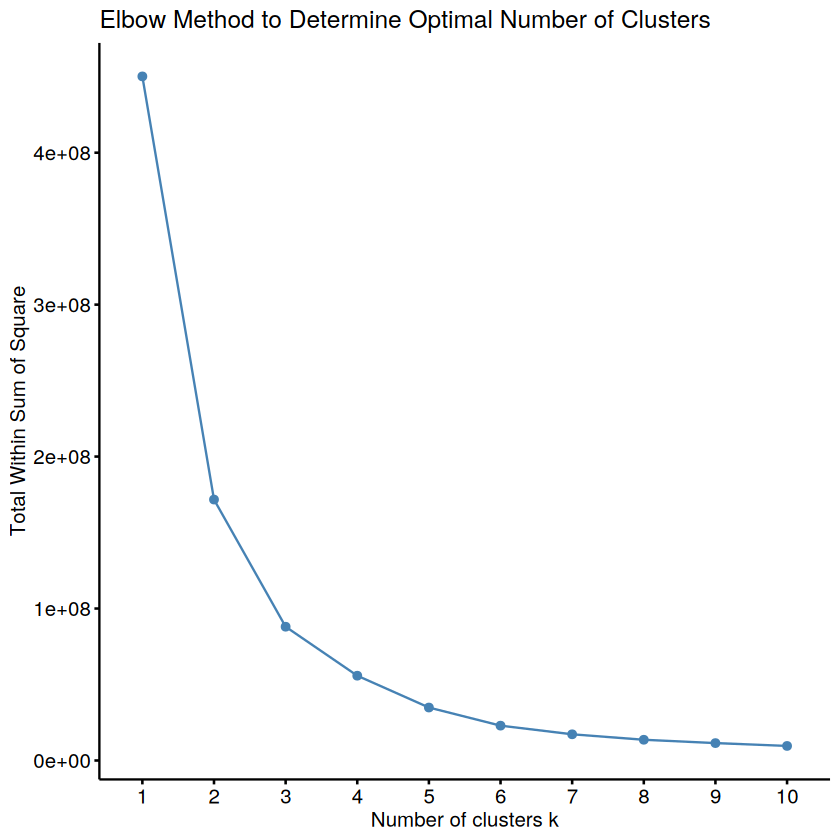

In [78]:
# 使用肘部法则确定最佳聚类数
# 计算并绘制不同聚类数目的总内平方和
# 注意：这个方法不一定总是能找到最优解，更多是作为一个启发式方法
fviz_nbclust(as.matrix(df_expanded$Value), FUN = hcut,hclust_method = "ward.D2", method = "wss") +
  ggtitle("Elbow Method to Determine Optimal Number of Clusters")



In [111]:
# 根据以上方法选择一个合适的聚类数目k
# 然后切割树状图得到k个簇
k <- 3 # 假设通过上述方法确定的最佳聚类数为3
clusters <- cutree(hclust_obj, k = k)


In [112]:
table(clusters)
dim(df_expanded)

clusters
    1     2     3 
16609  6389   510 

[1] 23508     3

In [113]:
# 输出每个编辑位点所属的簇
# print(clusters)
gene_expr_wz_cluster <- df_expanded
gene_expr_wz_cluster$cluster <- clusters
head(gene_expr_wz_cluster)
write.table(gene_expr_wz_cluster,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_expr/GABAergic_neurons/de_expr_genes_wz_3clusters.txt",quote=F,sep='\t',row.names=F)

,Row,Col,Value,cluster
,<chr>,<chr>,<dbl>,<int>
1,GYS2,avg_gene_expr_08,0.00,1
2,LOC101928304,avg_gene_expr_08,122.26,2
3,TNIP3,avg_gene_expr_08,0.00,1
4,LINC01232,avg_gene_expr_08,0.00,1
5,GCKR,avg_gene_expr_08,0.00,1
6,NTNG2,avg_gene_expr_08,0.00,1


In [114]:
table(gene_expr_wz_cluster$Col,gene_expr_wz_cluster$cluster)

                    
                        1    2    3
  avg_gene_expr_08   1200  697   62
  avg_gene_expr_12   1175  720   64
  avg_gene_expr_16_3 1355  572   32
  avg_gene_expr_16_4 1422  493   44
  avg_gene_expr_16_9 1361  564   34
  avg_gene_expr_19_1 1439  484   36
  avg_gene_expr_19_2 1354  559   46
  avg_gene_expr_19_3 1446  473   40
  avg_gene_expr_23_1 1525  405   29
  avg_gene_expr_23_2 1405  502   52
  avg_gene_expr_23_3 1418  492   49
  avg_gene_expr_26_1 1509  428   22

In [115]:
write.table(table(gene_expr_wz_cluster$Col,gene_expr_wz_cluster$cluster),"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_expr/GABAergic_neurons/de_expr_gene_num_in_3clusters.txt",sep='\t',quote=F)

In [116]:
data_summary <- gene_expr_wz_cluster %>%
  group_by(Col, cluster) %>%
  summarize(avg_expr = mean(Value),
            sd_expr = sd(Value)) # 添加标准差计算
data_summary$cluster <- as.factor(data_summary$cluster)
data_summary

`summarise()` has grouped output by 'Col'. You can override using the `.groups`
argument.


Col,cluster,avg_expr,sd_expr
<chr>,<fct>,<dbl>,<dbl>
avg_gene_expr_08,1,8.464061,17.53911
avg_gene_expr_08,2,267.143438,146.96309
avg_gene_expr_08,3,973.308913,320.60053
avg_gene_expr_12,1,12.634845,19.34200
avg_gene_expr_12,2,265.194327,141.84157
avg_gene_expr_12,3,975.793138,289.18146
avg_gene_expr_16_3,1,14.022151,18.88728
avg_gene_expr_16_3,2,255.438323,130.23950
avg_gene_expr_16_3,3,1067.177943,441.13771


In [117]:
# 假设df是原始的data_summary数据框

# 步骤1: 获取所有独特的Col和cluster组合
all_combinations <- expand.grid(unique(data_summary$Col), unique(data_summary$cluster))
colnames(all_combinations) <- c("Col", "cluster")

# 步骤2: 创建一个包含所有组合且初始化编辑水平为0的数据框
complete_data <- all_combinations %>%
  mutate(avg_expr = 0,
         sd_expr = 0)

# 步骤3: 将原始数据与新创建的数据框合并，确保所有组合都有记录
# 使用left_join确保所有来自complete_data的行都被保留
final_data <- complete_data %>%
  left_join(data_summary, by = c("Col", "cluster"), suffix = c("_init", "")) %>%
  select(-ends_with("_init")) # 移除初始化时添加的后缀列

# 如果有特定的值需要填充而非0，可以在第2步时相应修改
final_data[is.na(final_data)] <- 0
# 假设final_data已经是包含了所有组合（即使某些原始数据中未出现的组合值为0）的数据框

# 确保final_data中包含了误差范围的最小值和最大值列，如果还没有的话需要先计算并添加
# 这里简化处理，直接使用之前逻辑但确保使用final_data作为数据源
final_data <- final_data %>%
  group_by(Col, cluster) %>%
  mutate(min_val = avg_expr - sd_expr,
         max_val = avg_expr + sd_expr)
final_data <- as.data.frame(final_data)
head(final_data)

,Col,cluster,avg_expr,sd_expr,min_val,max_val
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,avg_gene_expr_08,1,8.464061,17.53911,-9.075053,26.00317
2,avg_gene_expr_12,1,12.634845,19.34200,-6.707155,31.97684
3,avg_gene_expr_16_3,1,14.022151,18.88728,-4.865128,32.90943
4,avg_gene_expr_16_4,1,13.174975,17.99342,-4.818450,31.16840
5,avg_gene_expr_16_9,1,13.352182,17.07544,-3.723258,30.42762
6,avg_gene_expr_19_1,1,13.665303,17.39296,-3.727659,31.05827


In [122]:
final_data$Col <- rep(c('GW08','GW12','GW16_1_3','GW16_1_4','GW16_1_9','GW19_1_1','GW19_1_2','GW19_1_3','GW23_1_1','GW23_1_2','GW23_1_3','GW26_1_1'),times=3)
head(final_data)

,Col,cluster,avg_expr,sd_expr,min_val,max_val
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,GW08,1,8.464061,17.53911,-9.075053,26.00317
2,GW12,1,12.634845,19.34200,-6.707155,31.97684
3,GW16_1_3,1,14.022151,18.88728,-4.865128,32.90943
4,GW16_1_4,1,13.174975,17.99342,-4.818450,31.16840
5,GW16_1_9,1,13.352182,17.07544,-3.723258,30.42762
6,GW19_1_1,1,13.665303,17.39296,-3.727659,31.05827


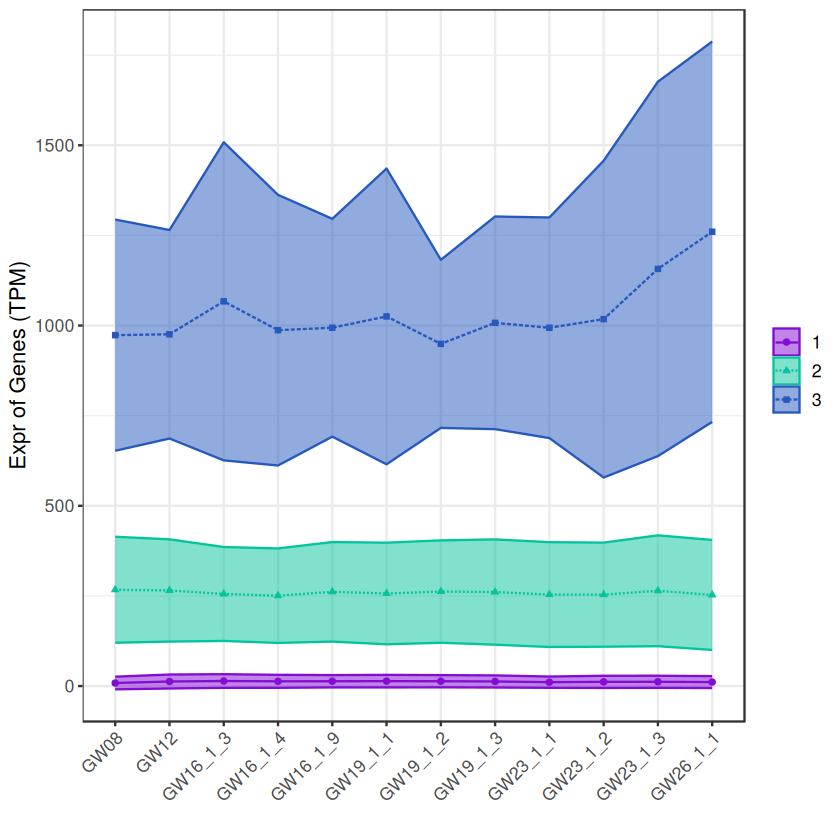

In [125]:

ggplot(data=final_data,aes(x=Col,y=avg_expr,group=cluster))+
  geom_line(aes(color=cluster,lty=cluster))+
  geom_point(aes(color=cluster,shape=cluster))+
  geom_ribbon(aes(x=Col,ymin=min_val,ymax=max_val,fill=cluster,
                  color=cluster),alpha=0.5)+
  scale_color_manual(values = c("1"="#840dd3","2"="#04c49c","3"="#2759bd"))+
  scale_fill_manual(values = c("1"="#840dd3","2"="#04c49c","3"="#2759bd"))+
  #colors=c("#840dd3","#04c49c","#2759bd")
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5),
        legend.title = element_blank(),
        axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(size = 13)) +
  xlab('')+
  ylab('Expr of Genes (TPM)')

In [59]:
#anova分析鉴定差异表达基因
p_values <- c()
for(gene in rownames(avg_expr_all_phases)){
    sub_sample_data <- as.data.frame(cbind(c('GW08','GW12',rep('GW16',3),rep('GW19',3),rep('GW23',3),'GW26'),colnames(avg_expr_all_phases), as.numeric(avg_expr_all_phases[gene,])))
    colnames(sub_sample_data) <- c("group","sample",'gene_tpm')
    sub_sample_data$group <- factor(sub_sample_data$group)
    #head(sub_sample_data)
    result <- aov(gene_tpm~group,sub_sample_data)
    p_value <- summary(result)[[1]][["Pr(>F)"]][1]
    p_values <- c(p_values,p_value) 
}

fdr_adjusted_p_values <- p.adjust(p_values, method = "BH")
table(fdr_adjusted_p_values < 0.05)
length(fdr_adjusted_p_values)
#对差异编辑的位点进行热图展示
de_data <- avg_expr_all_phases[which(fdr_adjusted_p_values < 0.05),]
dim(de_data)